In [1]:
from numpy import array

In [2]:
anisotropy_row = array([0.039,
                        0.035,
                        0.034,
                        0.045,
                        0.059,
                        0.075,
                        0.096,
                        0.115,
                        0.141,
                        0.154,
                        0.182,
                        0.211])
arp23_concentration_row = array([2,
                                 4,
                                 8,
                                 15,
                                 31,
                                 62,
                                 124,
                                 248,
                                 497,
                                 993,
                                 1986,
                                 3973]) / 1000.0

In [3]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [4]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [5]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return anisotropy

In [6]:
p2opt, p2cov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2])

Text(0.5,0,'Arp2/3 complex ($\\mu$M)')

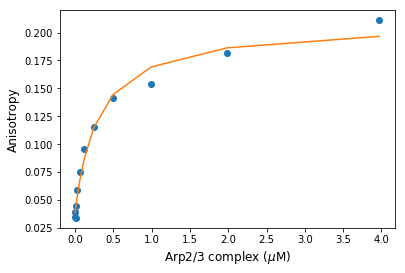

In [7]:
figure_handle, axes_handle = subplots()
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy(arp23_concentration_row, *p2opt))
axes_handle.set_ylabel(r'Anisotropy', fontsize = 12)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 12)

In [8]:
from numpy import diag
print(p2opt)
print(sqrt(diag(p2cov)))

[0.29466724 0.03777483 0.20840964]
[0.06181161 0.00451561 0.00868026]
